In [1]:
import math

def yield_to_price():
    more = True
    while more == True:
        Invalid = False
        option = input("same bond as before (1) or new bond (2)? ")
        if int(option) == 1:
            yld = input("Enter required yield (as a percentage): ")
            if freq.upper() == "S":
                yld = float(yld)/(2*100)
                par = float(par)
                coupon = float(par)*float(coup_rate)/(2*100)
                periods = 2*float(plazo)
            else:
                yld = float(yld)/100
                par = float(par)
                coupon = float(par)*float(coup_rate)/100
                periods = float(plazo)
        elif int(option) == 2:
            yld = input("Enter required yield (as a percentage): ")
            par = input("Enter par value: ")
            freq = input("Annual or semi-annual? (a/s): ")
            coup_rate = input("Enter coupon rate(as a percentage): ")
            plazo = input("Enter term to maturity in years: ")

            if freq.upper() == "S":
                yld = float(yld)/(2*100)
                par = float(par)
                coupon = float(par)*float(coup_rate)/(2*100)
                periods = 2*float(plazo)
            elif freq.upper() == "A":
                yld = float(yld)/100
                par = float(par)
                coupon = float(par)*float(coup_rate)/100
                periods = float(plazo)
            else:
                print("Invalid Entry")
                Invalid = True
        else:
            Print("Invalid Entry")
            Invalid = True

        if Invalid == False:
            price = coupon * (1-(1/math.pow(1 + yld,periods)))/yld + par/math.pow(1 + yld,periods)
            print(f"The price of the bond is {price}.")
            exitOption = input("Another calculation? (y/n)")
            if exitOption.upper() == "N":
                more = False
                print("OK")


In [5]:
yields = []
more = True
while more == True:
    yieldVal = input("Enter yield: ")
    if yieldVal.upper() != "N":
        yields.append(float(yieldVal))
    else:
        more = False

Enter yield: 4.5
Enter yield: 5
Enter yield: 5.5
Enter yield: 6
Enter yield: 6.1
Enter yield: n


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
yields = np.arange(4.5,18.6,0.5)

In [80]:
prices = []
c_rate = 10
plazo = 20
par = 1000
freq = 2

for yld in yields:
    coupon = c_rate*par/(freq*100)
    a = 1 + yld/(freq*100)
    b=1/a
    c=b**(plazo*freq)
    d = 1 - c
    e = d / (yld/(freq * 100))
    f = coupon*e
    g = f + 1000/((1+(yld/(freq*100)))**(plazo*freq))
    price = g

    prices.append(price)
                

<IPython.core.display.Javascript object>


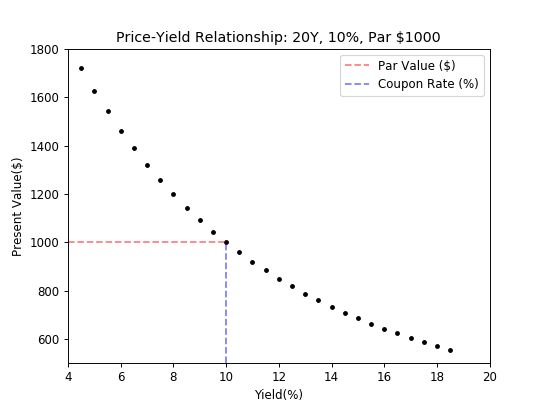

In [117]:
lowerylim = 500
upperylim = 1800
lowerxlim = 4
upperxlim = 20

plt.scatter(yields, prices, s=area, c="black", alpha=1)
plt.xlabel("Yield(%)")
plt.ylabel("Present Value($)")
plt.ylim(lowerylim, upperylim)
plt.xlim(lowerxlim, upperxlim)
plt.title("Price-Yield Relationship: 20Y, 10%, Par $1000")

xmax = (lowerxlim - c_rate)/((lowerxlim - c_rate)-(upperxlim -c_rate))

ymax = (lowerylim - par)/((lowerylim - par)-(upperylim - par))

plt.axhline(y = par, xmin = 0, xmax = xmax, color='r', linestyle='dashed',alpha=0.5,label="Par Value ($)")
plt.axvline(x = c_rate, ymin = 0, ymax = ymax, color='b', linestyle='dashed',alpha = 0.5, label="Coupon Rate (%)")
plt.legend(loc="upper right")

plt.show()

In [ ]:
def yield_to_price2:
    

In [2]:


par = 1000
plazo = 20
freq = 2
coup_rate = 10
    

In [5]:
time_ = np.arange(0,plazo + 1/freq, 1/freq)
time = []
for t in range(0,len(time_)):
    time.append(time_[-t - 1])

In [41]:
prem_rate = 7.8

In [40]:
disc_rate = 12

In [8]:
par_rate = coup_rate

In [45]:
par_vals = []
discount_vals = []
premium_vals = []
for n in time:
    par_price = ((coup_rate/100)*par/freq)*((1-(1/(math.pow(1+coup_rate/100/freq,n*freq))))/(coup_rate/100/freq)) + par/math.pow(1+coup_rate/100/freq,n*freq)
    par_vals.append(round(par_price, 6))
    discount_price = ((coup_rate/100)*par/freq)*((1-(1/(math.pow(1+disc_rate/100/freq,n*freq))))/(disc_rate/100/freq)) + par/math.pow(1+disc_rate/100/freq,n*freq)
    discount_vals.append(round(discount_price, 6))
    prem_price = ((coup_rate/100)*par/freq)*((1-(1/(math.pow(1+prem_rate/100/freq,n*freq))))/(prem_rate/100/freq)) + par/math.pow(1+prem_rate/100/freq,n*freq)
    premium_vals.append(round(prem_price, 6))

In [81]:
%matplotlib notebook

<IPython.core.display.Javascript object>


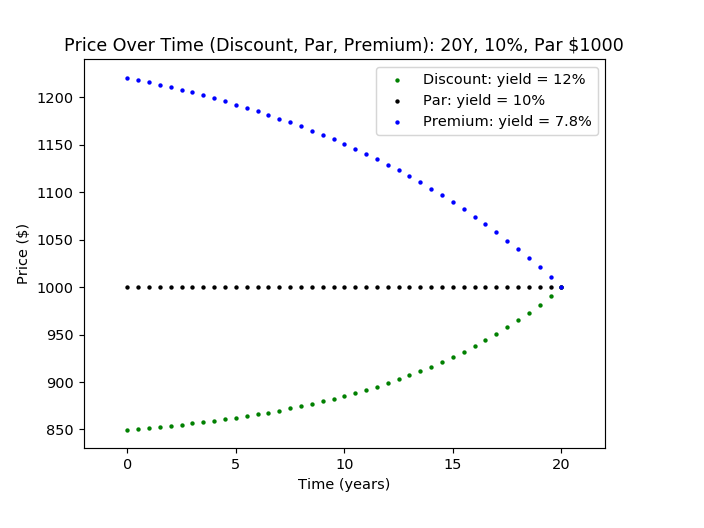

In [82]:
plt.scatter(time_, discount_vals, c="green", alpha=1, s=4, label="Discount: yield = 12%")
plt.scatter(time_, par_vals, c="black", alpha=1,s=4, label="Par: yield = 10%")
plt.scatter(time_, premium_vals, c="blue", alpha=1,s=4, label="Premium: yield = 7.8%")
ylower = 800


In [83]:

plt.xlabel("Time (years)")
plt.ylabel("Price ($)")
plt.title("Price Over Time (Discount, Par, Premium): 20Y, 10%, Par $1000")
plt.xlim(time_[0] - 2,time_[-1] + 2)

plt.legend(loc="upper right")
